In [1]:
GPT2_VERSION = 'distilgpt2'
FILTER = 'unfiltered'
SPLIT = 'dev'

In [2]:
import winogender
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions, get_odds_ratio
from transformers import GPT2Tokenizer
import json
from pandas import DataFrame

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [3]:
fname = f'winobias_data/attention_intervention_{GPT2_VERSION}_{FILTER}_{SPLIT}.json'
with open(fname) as f:
	results = json.load(f)	

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 160
Mean total effect: 0.012

INDIRECT Effect (mean = 0.0002397731525481333)
Top 10 heads:
   3 1: 0.011 (p=0.0000)
   3 6: 0.003 (p=0.0000)
   2 6: 0.002 (p=0.0000)
   2 3: 0.001 (p=0.0390)
   4 2: 0.001 (p=0.1107)
   0 8: 0.001 (p=0.1480)
   2 8: 0.001 (p=0.2113)
   0 2: 0.000 (p=0.2965)
   3 7: 0.000 (p=0.3238)
   3 8: 0.000 (p=0.3622)

DIRECT Effect (mean = 0.012023270527294846)
Top 10 heads:
   3 1: 0.002 (p=0.1446)
   2 6: 0.009 (p=0.3814)
   3 6: 0.009 (p=0.3939)
   4 2: 0.011 (p=0.4619)
   2 3: 0.011 (p=0.4768)
   3 7: 0.012 (p=0.4922)
   0 2: 0.012 (p=0.4923)
   4 0: 0.012 (p=0.4951)
   3 9: 0.012 (p=0.4958)
   3 8: 0.012 (p=0.4959)


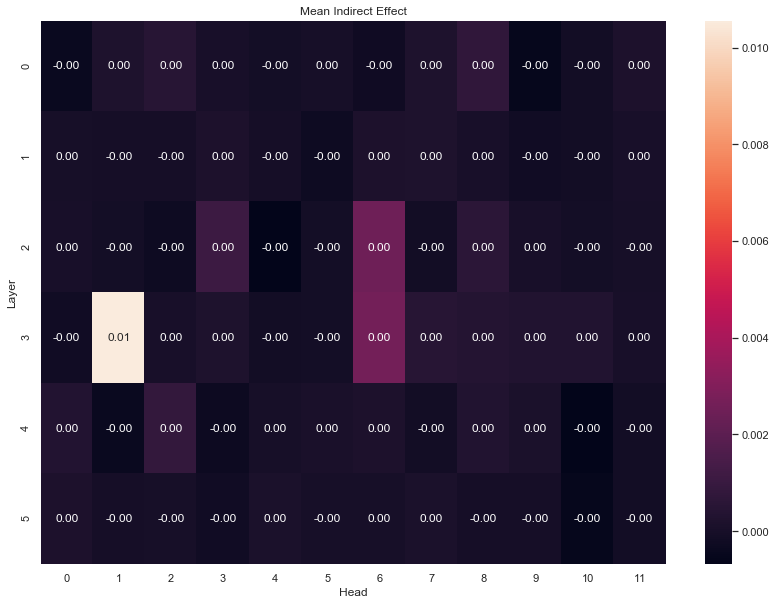

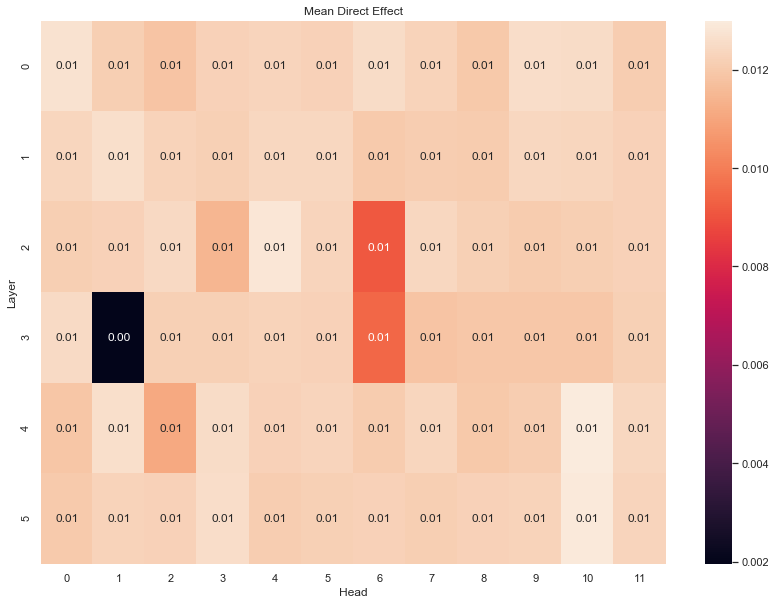

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 160
Mean total effect: 0.012


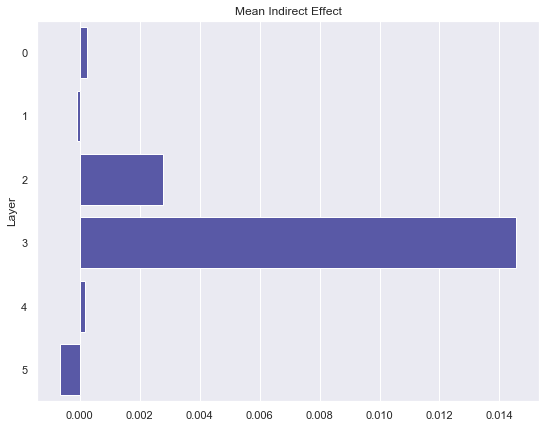

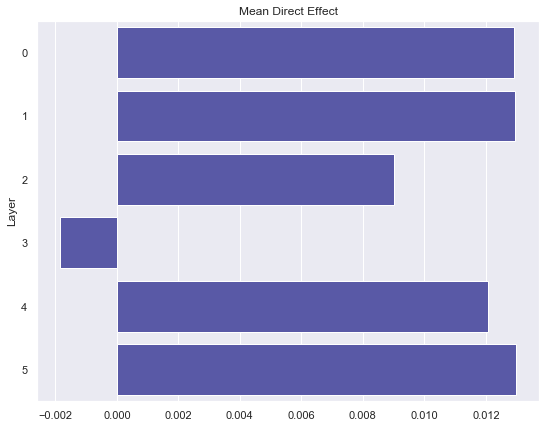

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The mover said thank you to the housekeeper because she
x': The mover said thank you to the housekeeper because he
c1: cleaned the truck .
c2: is grateful .

p(c2|x) / p(c1|x) = 2.28641
p(c2|x') / p(c1|x') = 2.06349

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = -0.097


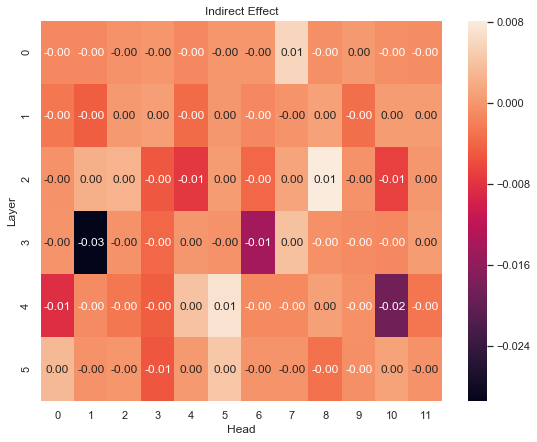

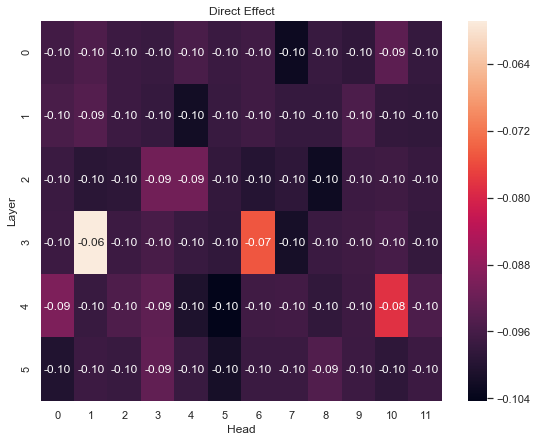

In [6]:
report_intervention(results[0])

x : The assistant scanned documents for the analyst because she
x': The assistant scanned documents for the analyst because he
c1: knows how to use the scan machine .
c2: asked .

p(c2|x) / p(c1|x) = 0.10103
p(c2|x') / p(c1|x') = 0.08343

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = -0.174


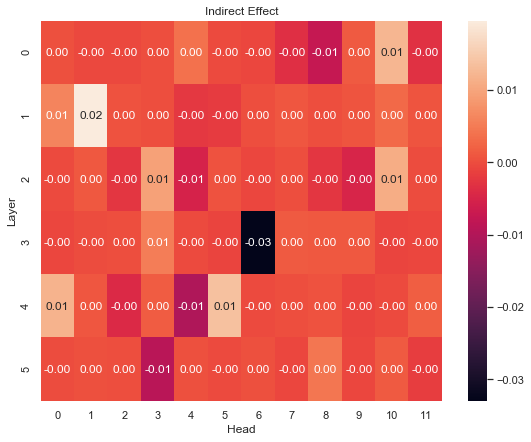

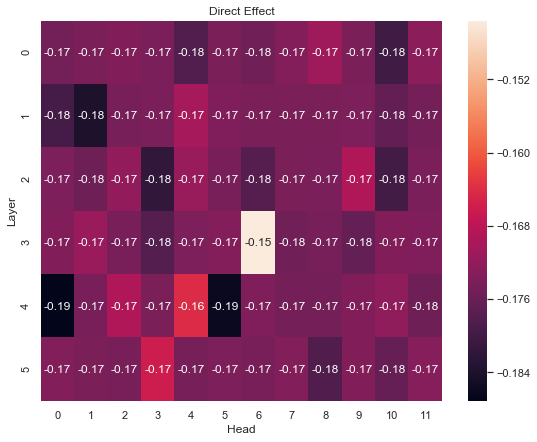

In [7]:
report_intervention(results[1])

x : The chief gave the housekeeper a tip because she
x': The chief gave the housekeeper a tip because he
c1: was helpful .
c2: was satisfied .

p(c2|x) / p(c1|x) = 2.32202
p(c2|x') / p(c1|x') = 1.96798

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = -0.152


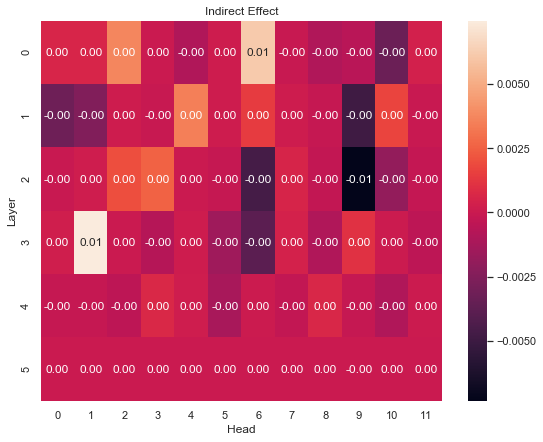

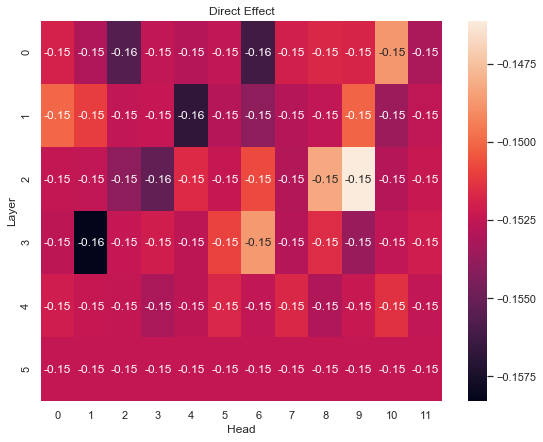

In [8]:
report_intervention(results[2])

x : The lawyer yelled at the hairdresser because she
x': The lawyer yelled at the hairdresser because he
c1: did a bad job .
c2: was mad .

p(c2|x) / p(c1|x) = 0.79809
p(c2|x') / p(c1|x') = 0.79765

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = -0.001


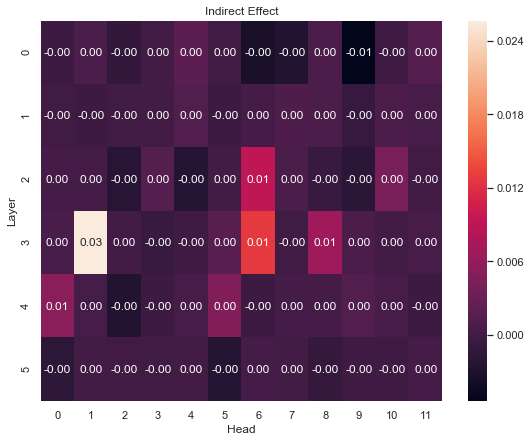

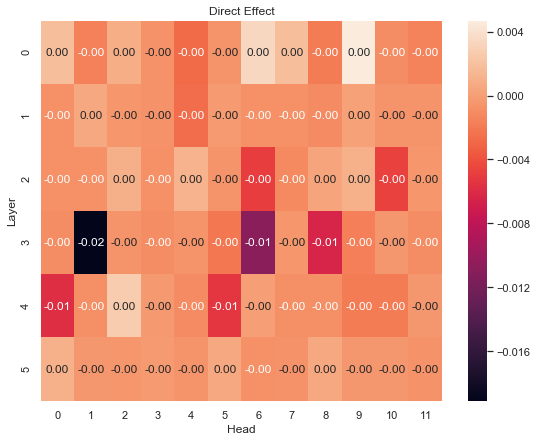

In [9]:
report_intervention(results[3])
